/home/spol/Documents/repos/hypermagnetics/data/Meshes_complete_2D/Grid_resBase_9_nGrains_5_nRef_3_dG_0_rand_76.txt


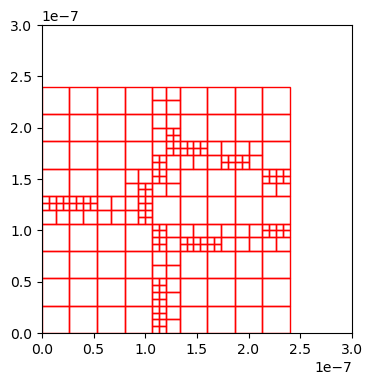

/home/spol/Documents/repos/hypermagnetics/data/Meshes_complete_2D/Grid_resBase_5_nGrains_20_nRef_2_dG_5_rand_17.txt


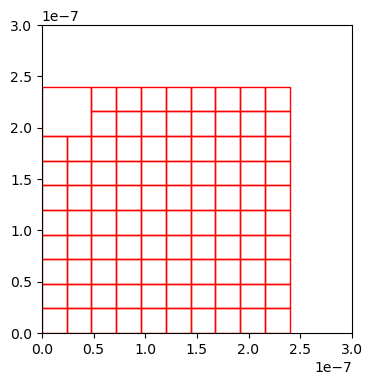

/home/spol/Documents/repos/hypermagnetics/data/Meshes_complete_2D/Grid_resBase_5_nGrains_5_nRef_3_dG_1_rand_49.txt
0.48
0.0666666667


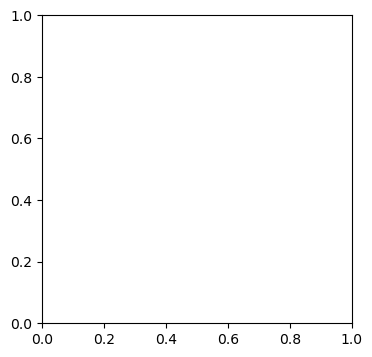

In [10]:
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

max_figures = 3
path = Path("/home/spol/Documents/repos/hypermagnetics/")
folder = path / "data" / "Meshes_complete_2D"
min_size = 3e-7
max_size = 0

cnt = 0
for filepath in list(folder.iterdir())[:300]:
    if cnt < max_figures:
        fig, ax = plt.subplots(figsize=(4, 4))
        print(filepath)
    with open(filepath, "r") as file:
        for i, line in enumerate(file):
            if i == 0:
                continue
            columns = line.split()
            r = columns[:3]
            size = columns[3:]

            # Convert the coordinates and size to integers
            r = [float(coord) for coord in r]
            size = [float(dim) for dim in size]
            for side in size[:2]:
                if side < min_size:
                    min_size = side

                if side > max_size:
                    max_size = side

            if cnt > max_figures:
                continue

            # Plot the rectangle
            if cnt < max_figures:
                rect = Rectangle((r[0] - size[0]/2, r[1] - size[1]/2), size[0], size[1], fill=False, edgecolor="red")
                ax.add_patch(rect)
    cnt += 1

    # Show the plot
    if cnt < max_figures:
        plt.xlim(0, 3e-7)
        plt.ylim(0, 3e-7)
        plt.show()

print(max_size * 1e7)
print(min_size * 1e7)